<a href="https://colab.research.google.com/github/namithatholasi/DS2022/blob/main/Project1_DS3021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 1

## Wrangling and EDA

First, go to the NHANES and LMF web sites and familiarize yourself with the data sources. Download codebooks. Think about what resources are available. The CDC Linked Mortality File is somewhat of a pain to work with, so I have pre-cleaned it for you. It is available at httts://github.com/ds4e/undergraduate_ml_assignments in the data folder, as lmf_parsed.cav. From the CDC LMF web page, get the SAS program to load the data; it is the real codebook.

Second, download the demographic data for the 1999--2000 wave from the NHANES page. You can use the following code chunk to merge the LMF and DEMO data:

In [ ]:
! git clone https://github.com/clairicelou/project_1_bsds
%run ./project_1_bsds/get_data.py

fatal: destination path 'project_1_bsds' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd

mdf = pd.read_csv(
    '/content/project_1_bsds/linked_mortality_file_1999_2000.csv',
    encoding='latin1'
)

mdf.head()

,SEQN,ELIGSTAT,MORTSTAT,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM
0,1,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1.0,6.0,0.0,0.0,177.0,177.0
2,3,2,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0.0,NaN,NaN,NaN,244.0,244.0


In [ ]:
mdf.columns

Index(['SEQN', 'ELIGSTAT', 'MORTSTAT', 'UCOD_LEADING', 'DIABETES', 'HYPERTEN',
       'PERMTH_INT', 'PERMTH_EXM'],
      dtype='object')

In [ ]:
gdf = pd.read_sas("project_1_bsds/DEMO.xpt", format="xport")

gdf.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP43,WTIREP44,WTIREP45,WTIREP46,WTIREP47,WTIREP48,WTIREP49,WTIREP50,WTIREP51,WTIREP52
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,10094.017100,9912.461855,9727.078709,10041.524113,9.953956e+03,9857.381983,9865.152486,10327.992682,9809.165049,10323.315747
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,27186.728682,27324.345051,28099.663528,27757.066921,2.804929e+04,26716.602006,26877.704909,27268.025234,27406.383620,26984.812909
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,43993.193099,44075.386428,46642.563799,44967.681579,4.457248e+04,44087.945688,44831.370881,44480.987235,45389.112766,43781.905637
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,10702.307249,10531.444441,10346.119327,10636.063039,5.397605e-79,10533.108939,10654.749584,10851.024385,10564.981435,11012.529729
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,93164.782430,92119.608772,95388.490406,94131.383538,9.529781e+04,91325.082461,91640.586117,92817.926915,94282.855382,91993.251203


In [ ]:
df = gdf.merge(mdf, on="SEQN", how="inner")
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP50,WTIREP51,WTIREP52,ELIGSTAT,MORTSTAT,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,10327.992682,9809.165049,10323.315747,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,27268.025234,27406.383620,26984.812909,1,1.0,6.0,0.0,0.0,177.0,177.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,44480.987235,45389.112766,43781.905637,2,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,10851.024385,10564.981435,11012.529729,2,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,92817.926915,94282.855382,91993.251203,1,0.0,NaN,NaN,NaN,244.0,244.0


Third, the variables ELIGSTAT, MORTSTAT, PERMTH_INT, and RIDAGEEX are particularly important. Look them up in the documentation and clearly describe them.





ELIGSTAT: ELIGSTAT is Eligibility Status for Mortality Follow-up. This tells us whether someone from the survey can be linked to mortality records. Eligible (1) means that they have enough information to check if they’re in mortality records. Even if someone is technically “ineligible” for matching, they’re still included in the files. Under 18 (2) means people under 18 aren’t included in the public data for this. And ineligible (3) means that they don’t have enough information to link to mortality records. It’s a way to know who can be tracked for mortality and who can’t.

MORTSTAT: The MORTSTAT variable is the final determination of vital status and should be used as an outcome variable to calculate survival. Each survey participant who is eligible for mortality follow-up is assigned a vital status code (0=Assumed alive, 1=Assumed deceased)

PERMTH_INT: The PERMTH_INT variable represents the number of person-months of follow-up from the household interview date to the date of death or the date of censoring in mortality studies.

RIDAGEEX: RIDAGEEX is an NHANES demographic variable that records a participant’s age in months at the time of their physical exam in the Mobile Examination Center (MEC). It provides a more precise age measure than age in years.

Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (MORTSTAT) and life expectancy (PERMTH_INT). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use .merge to combine your data into one complete dataframe. Document missing values.

**Answer: We selected this data because we were interested in seeing the correlation between alcohol and life expectancy. We wanted to learn about different aspects of alcohol, and how that could harm the health of a patient, and in turn, lead to lowering life expectancy**

In [ ]:
alq = pd.read_sas("project_1_bsds/ALQ.xpt", format="xport")

alq.head()


,SEQN,ALQ100,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ140Q,ALQ140U,ALQ150
0,2.0,1.0,NaN,24.0,3.0,1.0,5.397605e-79,NaN,2.0
1,5.0,1.0,NaN,4.0,1.0,3.0,1.200000e+01,3.0,2.0
2,7.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,1.0,NaN,6.0,3.0,1.0,5.397605e-79,NaN,2.0
4,12.0,1.0,NaN,2.0,2.0,3.0,1.000000e+00,3.0,1.0


In [ ]:
df = df.merge(alq, on="SEQN", how="inner")
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,PERMTH_INT,PERMTH_EXM,ALQ100,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ140Q,ALQ140U,ALQ150
0,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,177.0,177.0,1.0,NaN,24.0,3.0,1.0,5.397605e-79,NaN,2.0
1,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,244.0,244.0,1.0,NaN,4.0,1.0,3.0,1.200000e+01,3.0,2.0
2,7.0,1.0,2.0,2.0,2.0,59.0,712.0,712.0,4.0,2.0,...,237.0,236.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,1.0,2.0,2.0,1.0,43.0,518.0,518.0,4.0,2.0,...,231.0,231.0,1.0,NaN,6.0,3.0,1.0,5.397605e-79,NaN,2.0
4,12.0,1.0,2.0,1.0,1.0,37.0,453.0,454.0,3.0,1.0,...,236.0,236.0,1.0,NaN,2.0,2.0,3.0,1.000000e+00,3.0,1.0


In [ ]:
df.isna().sum()

,0
SEQN,0
SDDSRVYR,0
RIDSTATR,0
RIDEXMON,0
RIAGENDR,0
...,...
ALQ120U,1793
ALQ130,1788
ALQ140Q,1788
ALQ140U,3465


After merging the data, I noticed that demographic variables had no missing values, but a lot of the alcohol questions (like ALQ120U, ALQ130, ALQ140Q, ALQ140U, and ALQ150) had missing entries. This makes sense because people who never drank weren’t asked the follow-up questions, so the missing values just reflect how the survey was designed.

Third, do basic EDA and visualization of the key variables. Are any important variables skewed? Are there outliers? How correlated are pairs of variables? Do pairs of categorical variables exhibit interesting patterns in contingency tables? Provide a clear discussion and examination of the data and the variables you are interested in using.

The numeric alcohol variables are skewed to the right, meaning that most people drink a little, but a few people drink a lot.


In [ ]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,PERMTH_INT,PERMTH_EXM,ALQ100,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ140Q,ALQ140U,ALQ150
count,4444.000000,4444.0,4444.0,4444.000000,4444.000000,4444.000000,4327.000000,4312.000000,4444.000000,4444.000000,...,4441.000000,4441.000000,4161.000000,1408.000000,3.519000e+03,2651.000000,2656.000000,2.656000e+03,979.000000,3519.000000
mean,4983.899865,1.0,2.0,1.592709,1.533303,49.889064,592.804252,593.638451,2.652340,2.065707,...,201.935825,201.139608,1.343427,1.455966,4.702472e+00,1.951339,3.099774,9.262048e+00,2.500511,1.820972
std,2863.442030,0.0,0.0,0.491385,0.498946,18.841213,218.069518,218.129306,1.158774,1.178700,...,66.139534,66.138613,0.515678,0.498234,3.984899e+01,0.863237,5.376049,5.974556e+01,0.790246,0.468208
min,2.000000,1.0,2.0,1.000000,1.000000,20.000000,240.000000,240.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,5.397605e-79,1.000000,1.000000
25%,2457.750000,1.0,2.0,1.000000,1.000000,33.000000,403.000000,404.000000,1.000000,1.000000,...,187.000000,186.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,5.397605e-79,2.000000,2.000000
50%,4979.500000,1.0,2.0,2.000000,2.000000,48.000000,572.000000,573.000000,3.000000,2.000000,...,235.000000,234.000000,1.000000,1.000000,2.000000e+00,2.000000,2.000000,5.397605e-79,3.000000,2.000000
75%,7454.500000,1.0,2.0,2.000000,2.000000,66.000000,779.000000,780.000000,3.000000,3.000000,...,242.000000,241.000000,2.000000,2.000000,3.000000e+00,3.000000,3.000000,2.000000e+00,3.000000,2.000000
max,9965.000000,1.0,2.0,2.000000,2.000000,85.000000,1018.000000,1019.000000,5.000000,5.000000,...,250.000000,249.000000,9.000000,2.000000,9.990000e+02,3.000000,99.000000,9.990000e+02,3.000000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Columns: 159 entries, SEQN to ALQ150
dtypes: float64(158), int64(1)
memory usage: 5.4 MB


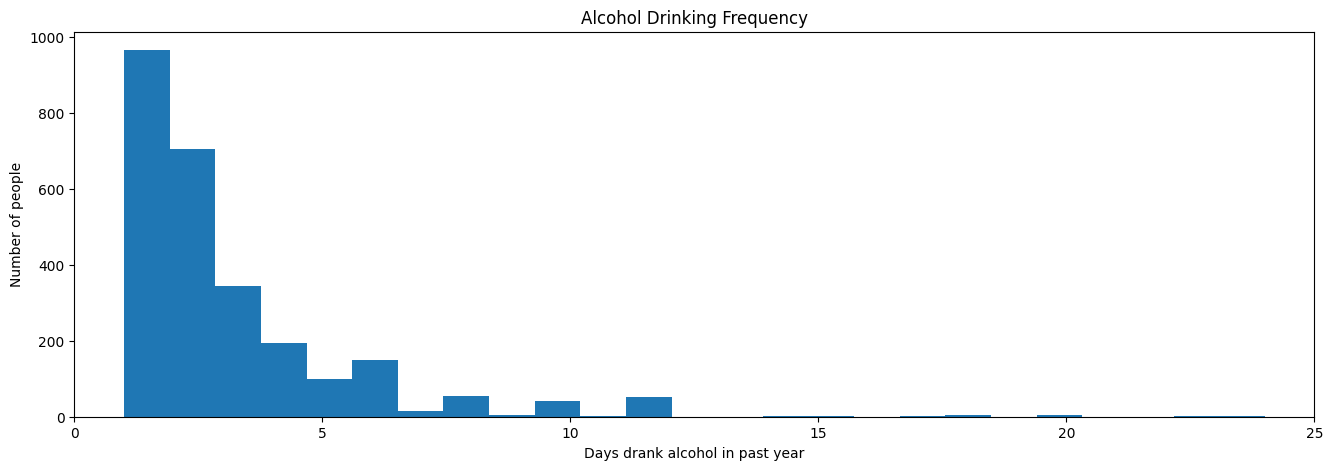

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))

filtered = df['ALQ130'].dropna()
filtered = filtered[(filtered >= 0) & (filtered <= 25)]

plt.hist(filtered, bins=25)

plt.xlim(0, 25)

plt.title("Alcohol Drinking Frequency")
plt.xlabel("Days drank alcohol in past year")
plt.ylabel("Number of people")

plt.show()


The histogram above shows that people mostly drink very infequently, with most reporting 1-3 days of the year. The number of individuals decreases sharply as the amount of days keep increasing.

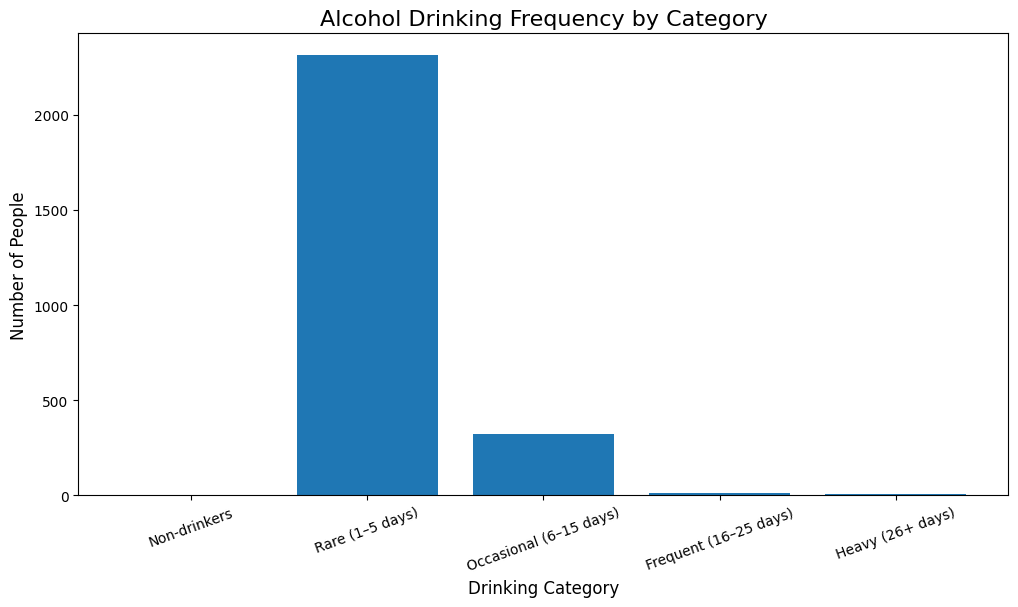

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get alcohol data
alq = df['ALQ130'].dropna()

# Create categories
categories = pd.cut(
    alq,
    bins=[-1, 0, 5, 15, 25, 365],
    labels=[
        "Non-drinkers",
        "Rare (1–5 days)",
        "Occasional (6–15 days)",
        "Frequent (16–25 days)",
        "Heavy (26+ days)"
    ]
)

# Count people in each category
counts = categories.value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(12,6))

plt.bar(counts.index, counts.values)

plt.title("Alcohol Drinking Frequency by Category", fontsize=16)
plt.xlabel("Drinking Category", fontsize=12)
plt.ylabel("Number of People", fontsize=12)

plt.xticks(rotation=20)

plt.show()




This graph above continues to reinforce that rare drinking between 1-5 days is more common than heavy drinking

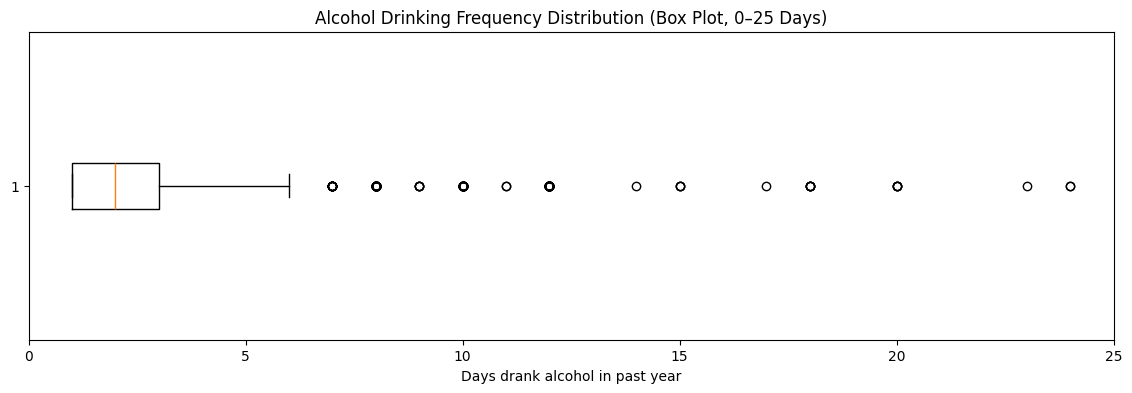

In [ ]:
plt.figure(figsize=(14,4))

filtered = df['ALQ130'].dropna()
filtered = filtered[(filtered >= 0) & (filtered <= 25)]

plt.boxplot(
    filtered,
    vert=False,
    showfliers=True
)

plt.title("Alcohol Drinking Frequency Distribution (Box Plot, 0–25 Days)")
plt.xlabel("Days drank alcohol in past year")

plt.xlim(0, 25)

plt.show()


**The distribution of alcohol drinking frequency is strongly right-skewed, with a median of about 2 days and most values concentrated between roughly 1 and 3 days. Several high-end outliers (around 7 to 24 days) indicate a small group of individuals who drink substantially more frequently than the majority of the sample.**

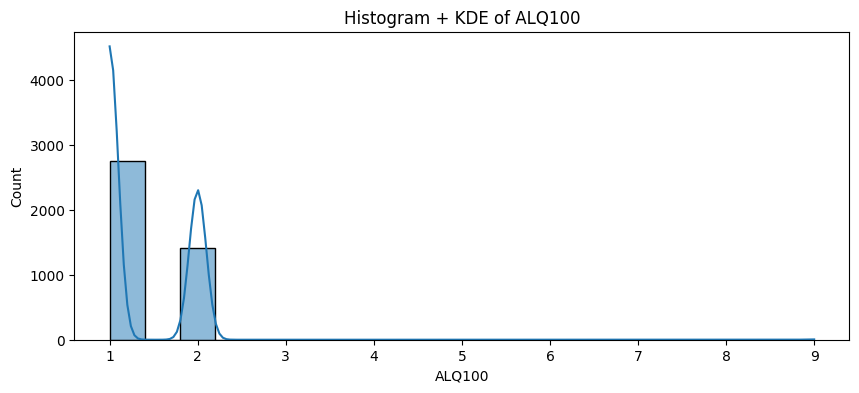

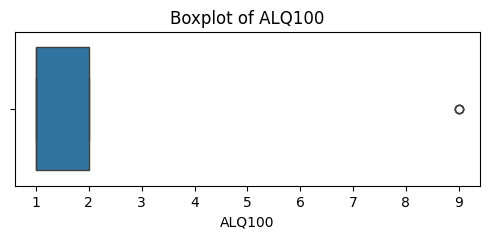

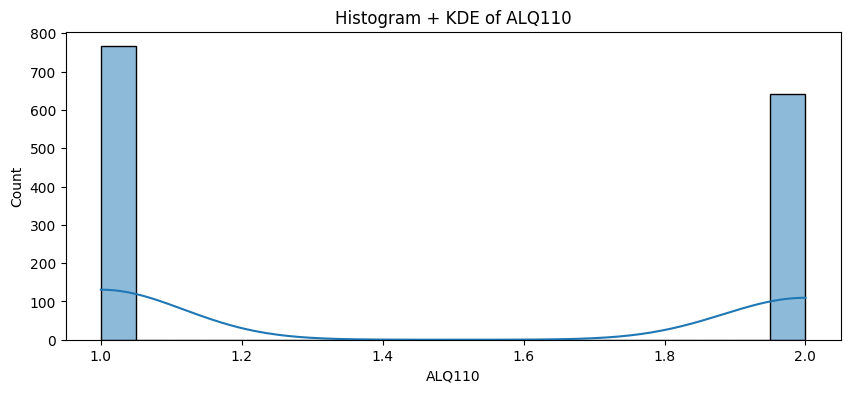

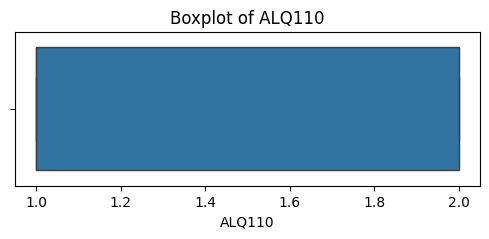

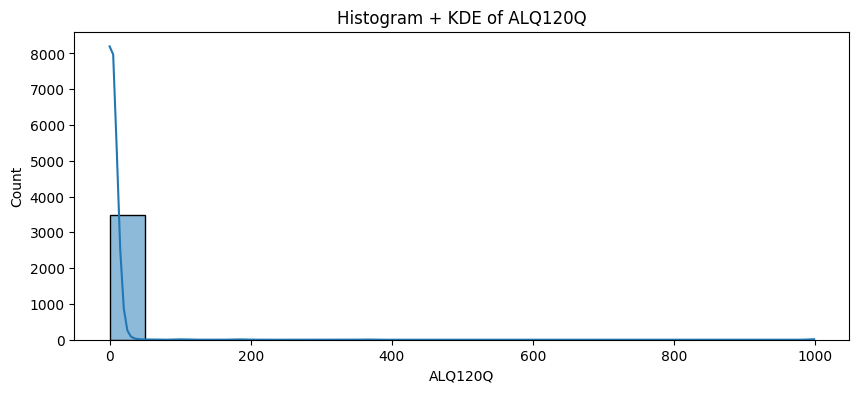

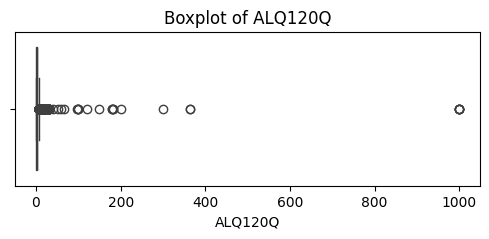

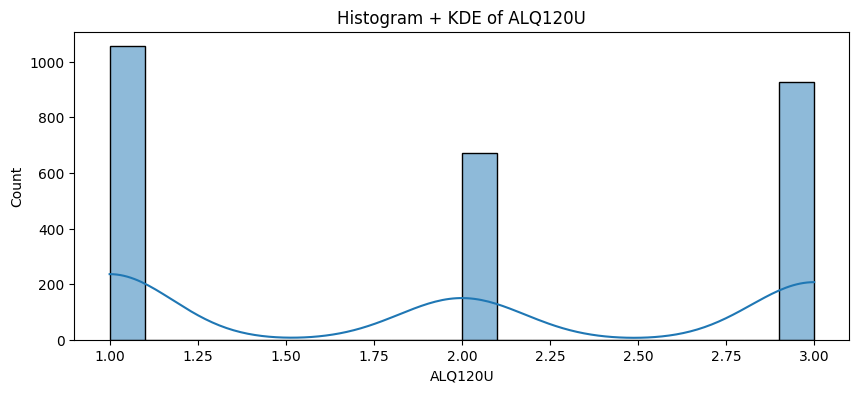

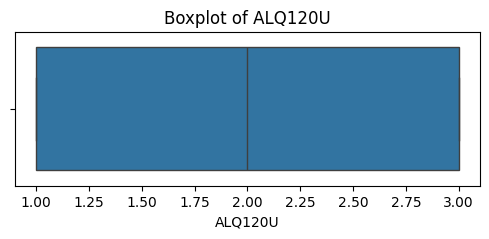

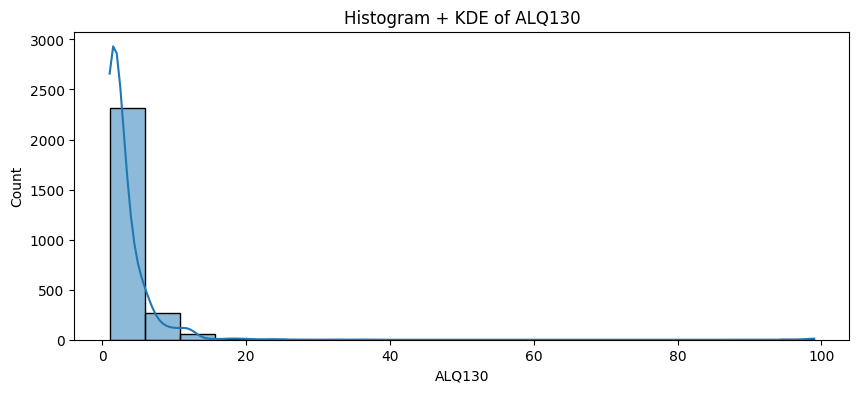

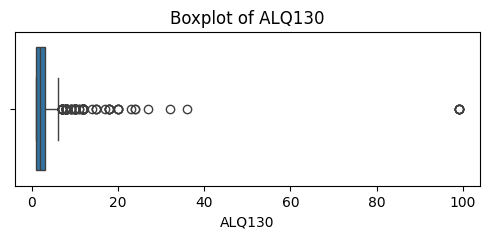

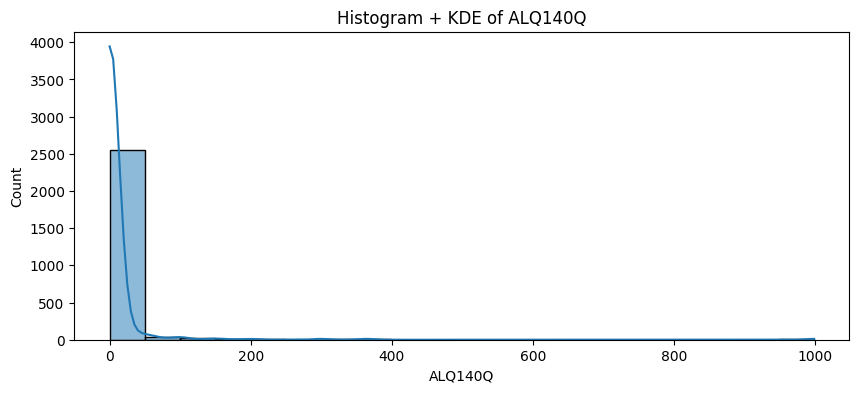

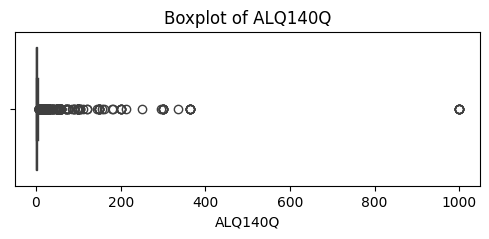

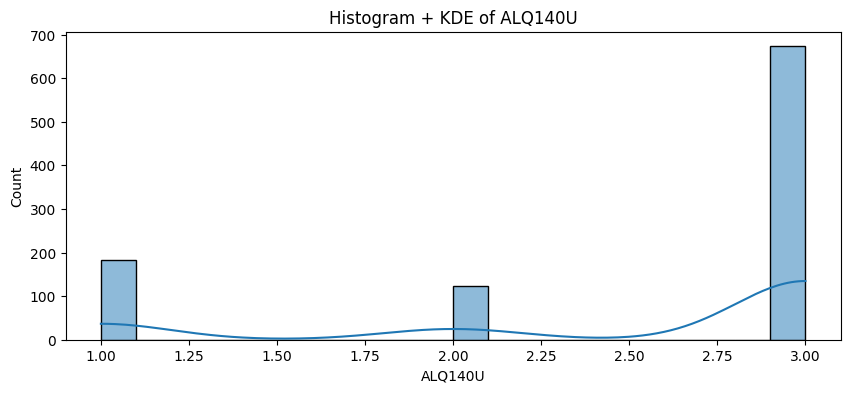

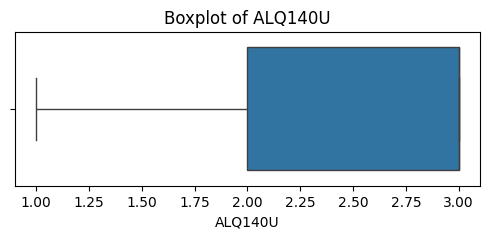

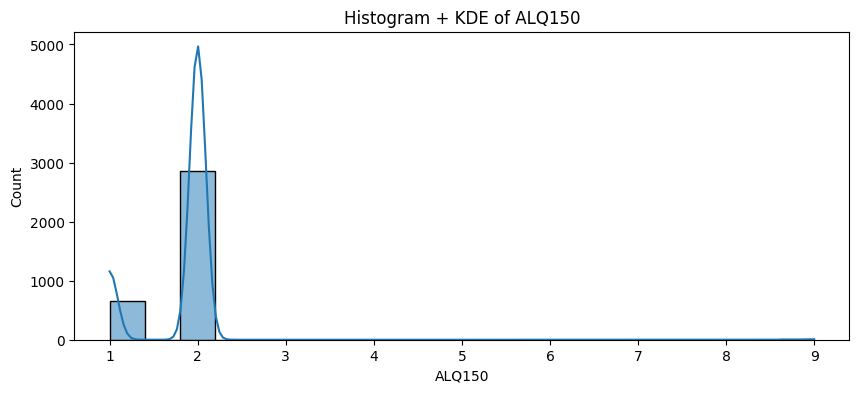

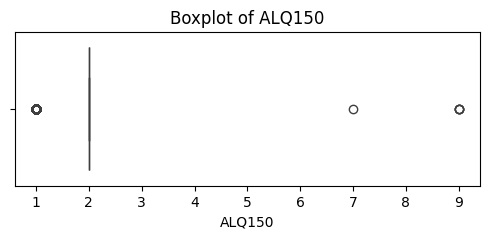

In [ ]:
num_vars = [col for col in df.columns if "ALQ" in col and df[col].dtype != 'object']

for v in num_vars:
    if df[v].dropna().empty:
        continue

    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=v, bins=20, kde=True, edgecolor='black', linewidth=1)
    plt.title(f"Histogram + KDE of {v}")
    plt.xlabel(v)
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[v])
    plt.title(f"Boxplot of {v}")
    plt.show()

Looking at the alcohol variables, most respondents never drink or drink very little. For categorical variables like ALQ100 and ALQ110, most people are in the first category (never drank or <12 drinks/year), but there’s a smaller group in the higher category. Numeric variables like drinking frequency (ALQ120Q), units per occasion (ALQ120U), average drinks per day (ALQ130), and binge frequency (ALQ140) are heavily skewed: the majority are low or zero, but a few heavy drinkers create a long tail with many outliers in the boxplots. Overall, the distributions make sense given survey skip logic: non-drinkers have low values or zeros, and only drinkers contribute to the higher ranges.

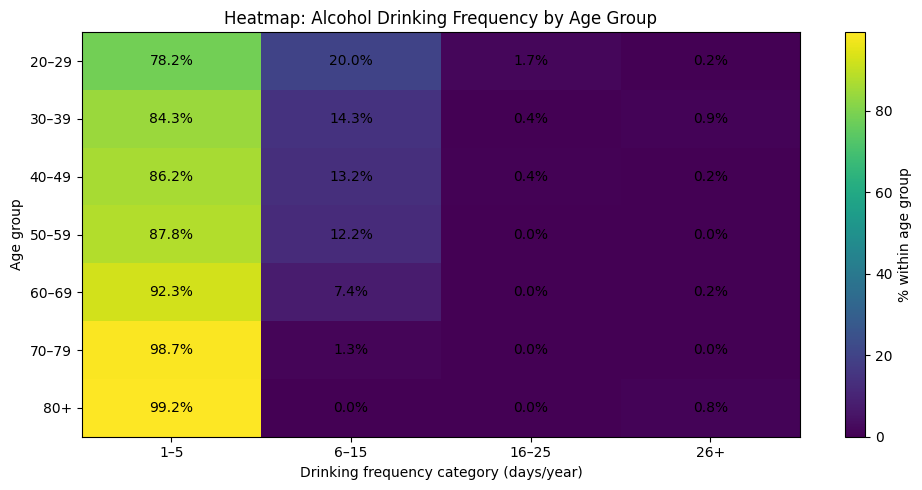

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

alq = df['ALQ130'].dropna()

drink_cat = pd.cut(
    alq,
    bins=[-1, 0, 5, 15, 25, 365],
    labels=["0 days", "1–5", "6–15", "16–25", "26+"]
)

tmp = df.loc[alq.index].copy()
tmp["drink_cat"] = drink_cat

tmp["age_group"] = pd.cut(
    tmp["RIDAGEYR"],
    bins=[19, 29, 39, 49, 59, 69, 79, 120],
    labels=["20–29","30–39","40–49","50–59","60–69","70–79","80+"]
)

heat = pd.crosstab(tmp["age_group"], tmp["drink_cat"], normalize="index") * 100
heat = heat.fillna(0)

plt.figure(figsize=(10, 5))
im = plt.imshow(heat.values, aspect="auto")

plt.colorbar(im, label="% within age group")
plt.title("Heatmap: Alcohol Drinking Frequency by Age Group")
plt.xlabel("Drinking frequency category (days/year)")
plt.ylabel("Age group")

plt.xticks(range(len(heat.columns)), heat.columns)
plt.yticks(range(len(heat.index)), heat.index)

for i in range(heat.shape[0]):
    for j in range(heat.shape[1]):
        plt.text(j, i, f"{heat.values[i, j]:.1f}%", ha="center", va="center")

plt.tight_layout()
plt.show()


**As shown by the heatmap above, as age increases, the drinking frequency also declines. Younger individuals have the highest proportion of occasional and frequent drinkers. On the other hand, older individuals have the lowest proportions.**


In [ ]:
num_vars = ["ALQ120Q", "ALQ120U", "ALQ130", "ALQ140Q"]
cat_vars = ["ALQ100", "ALQ110", "ALQ150"]

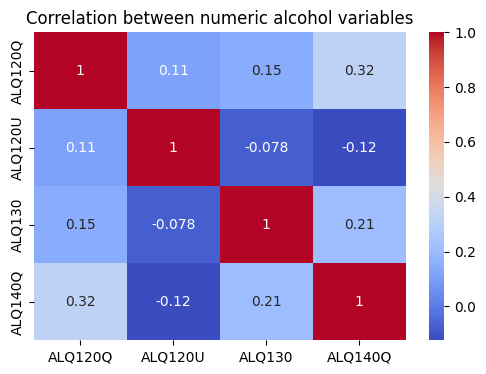

In [ ]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(6,4))
sns.heatmap(df[num_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between numeric alcohol variables")
plt.show()

The correlation heatmap shows the relationships between numeric alcohol variables like drinking frequency (ALQ120Q), units per occasion (ALQ120U), average drinks per day (ALQ130), and binge frequency (ALQ140Q). Most of the boxes are blue or not close to 1, which means the correlations are moderate to low. This tells us that while people who drink more often tend to drink a bit more per occasion, the relationship isn’t super strong. Drinking frequency doesn’t perfectly predict how much someone drinks or how often they binge.

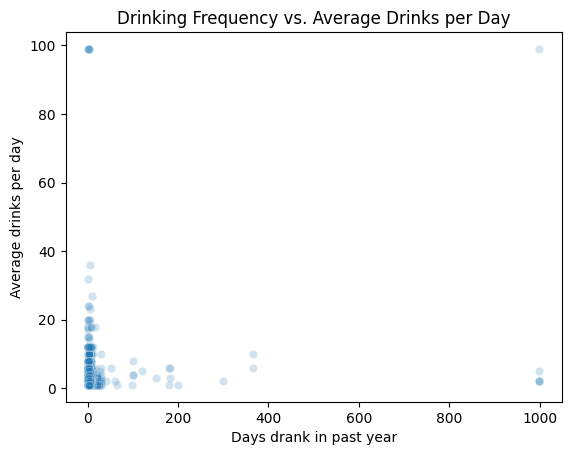

In [ ]:
# Scatterplots between numeric pairs
sns.scatterplot(data=df, x="ALQ120Q", y="ALQ130", alpha=0.2)
plt.title("Drinking Frequency vs. Average Drinks per Day")
plt.xlabel("Days drank in past year")
plt.ylabel("Average drinks per day")
plt.show()

The scatterplot shows drinking frequency (ALQ120Q) versus average drinks per day (ALQ130). Most points are clustered near 0 on both axes, which means that the majority of respondents drink rarely or not at all. A few points spread out to higher values represent people who drink more often and/or have higher average drinks per day. This creates a long tail, which matches what we saw in the histograms and boxplots, most people are light or non-drinkers, but a small group of heavy drinkers pulls the distribution up.

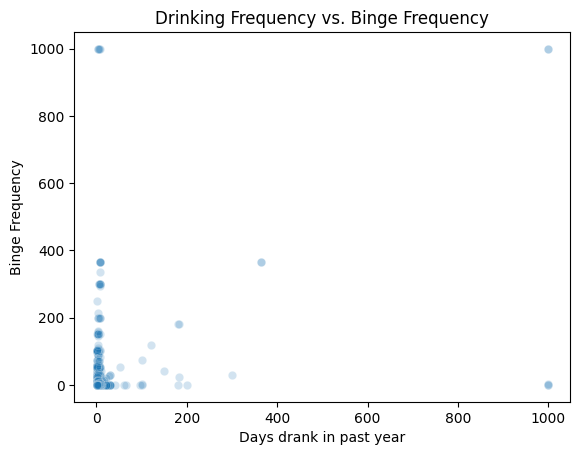

In [ ]:
sns.scatterplot(data=df, x="ALQ120Q", y="ALQ140Q", alpha=0.2)
plt.title("Drinking Frequency vs. Binge Frequency")
plt.xlabel("Days drank in past year")
plt.ylabel("Binge Frequency")
plt.show()

Most people drink rarely or don’t binge, so points cluster near 0. A few heavy drinkers show up as outliers, indicating higher drinking and bingeing behavior.

## k-NN classification/regression & write-up

1) Describe the data, particularly what an observation is and whether there are any missing data that might impact your analysis. Who collected the data and why? What known limitations are there to analysis?

This data comes from NHANES, a survey run by the CDC to learn about people’s health and nutrition in the U.S. Each row is one person, with information like age, gender, and alcohol use. Some alcohol questions have missing answers, mostly because people who don’t drink skipped them, which can affect our analysis. People might underreport their drinking and some heavy drinkers create outliers. Since the survey only looks at people at one point in time, we can see patterns but can’t say what causes what.




2) Describe the variables you selected to predict mortality and life expectancy, and the rationale behind them. Analyze your variables using describe tables, kernel densities, scatter plots, and conditional kernel densities. Are there any patterns of interest to notice?

Descriptive stats for numeric variables:

In [ ]:
mort_vars = ["ALQ120Q","ALQ130","ALQ140Q","RIDAGEYR"]
df[mort_vars].describe()

,ALQ120Q,ALQ130,ALQ140Q,RIDAGEYR
count,3.519000e+03,2656.000000,2.656000e+03,4444.000000
mean,4.702472e+00,3.099774,9.262048e+00,49.889064
std,3.984899e+01,5.376049,5.974556e+01,18.841213
min,5.397605e-79,1.000000,5.397605e-79,20.000000
25%,1.000000e+00,1.000000,5.397605e-79,33.000000
50%,2.000000e+00,2.000000,5.397605e-79,48.000000
75%,3.000000e+00,3.000000,2.000000e+00,66.000000
max,9.990000e+02,99.000000,9.990000e+02,85.000000


Most people in this dataset drink very little or not at all, but a few heavy drinkers create extreme outliers, which makes the distributions skewed. Age ranges from 20–85 with a median around 48. Some alcohol questions are missing for non-drinkers, which could affect analysis.

Histogram + KDE for numeric variables:

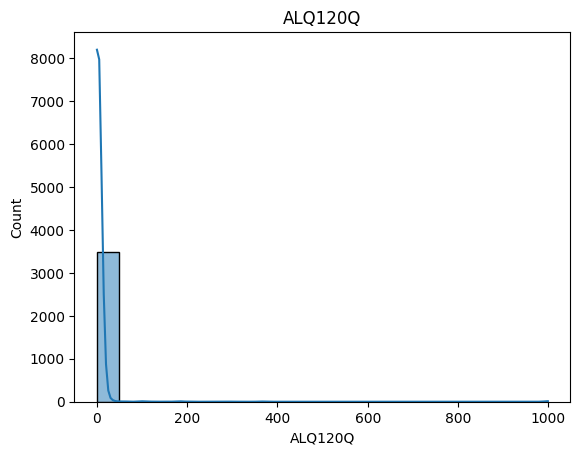

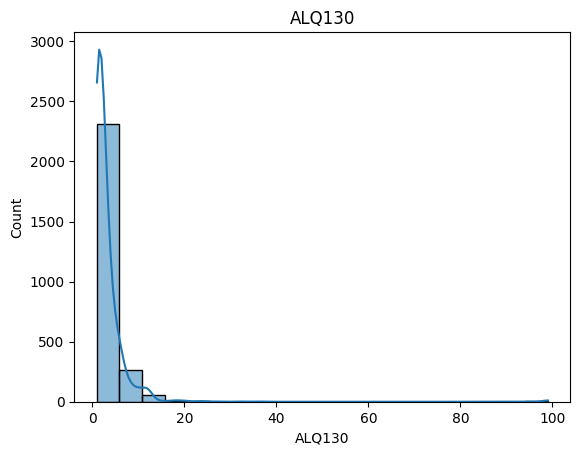

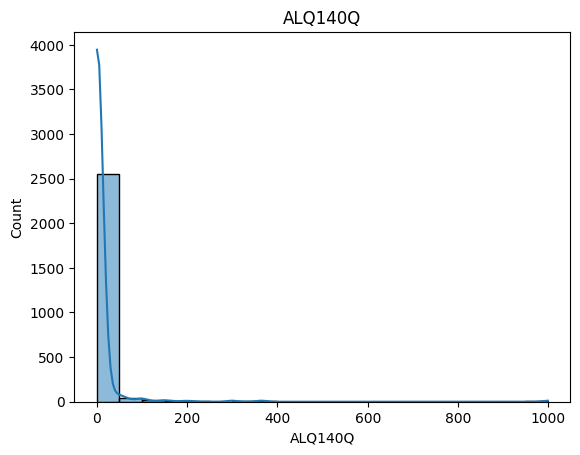

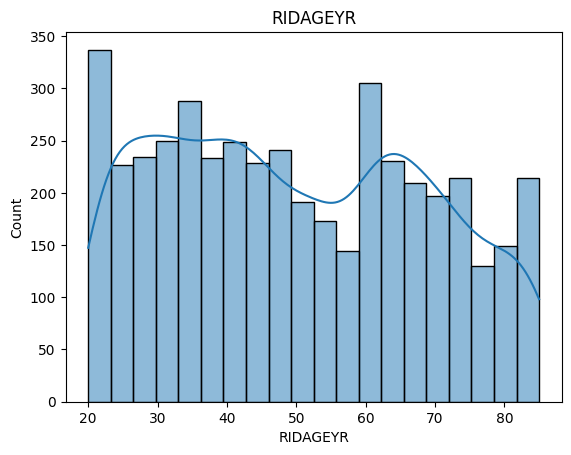

In [ ]:
for v in mort_vars:
    sns.histplot(df[v], bins=20, kde=True)
    plt.title(v)
    plt.show()

For the alcohol variables (ALQ120Q, ALQ130, ALQ140Q), the histograms are heavily clustered on the left, meaning most participants drink very little or not at all. There are a few taller bars farther out, which represent rare heavy drinkers, these create a long tail.

For age (RIDAGEYR), the histogram looks different. Most bars are fairly similar in height, but it goes up and down a bit, showing that participants are spread across many ages, with some age groups slightly more common than others. Overall, age is more evenly distributed than the alcohol variables.

Boxplots by categorical outcomes:

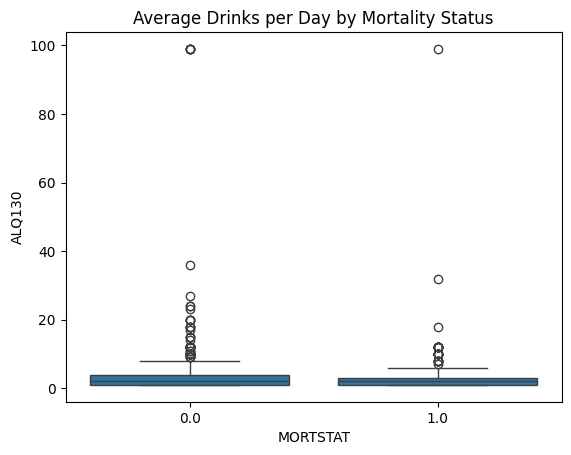

In [ ]:
sns.boxplot(x="MORTSTAT", y="ALQ130", data=df)
plt.title("Average Drinks per Day by Mortality Status")
plt.show()

This boxplot shows average drinks per day (ALQ130) by mortality status (MORTSTAT). Most participants cluster at low values, so the box is small, meaning the typical person drinks only a little. The dots above the box are outliers, representing a few people who drink much more than average. The plot shows that most participants are light drinkers, and heavy drinkers are rare.

Conditional KDE by mortality or gender:

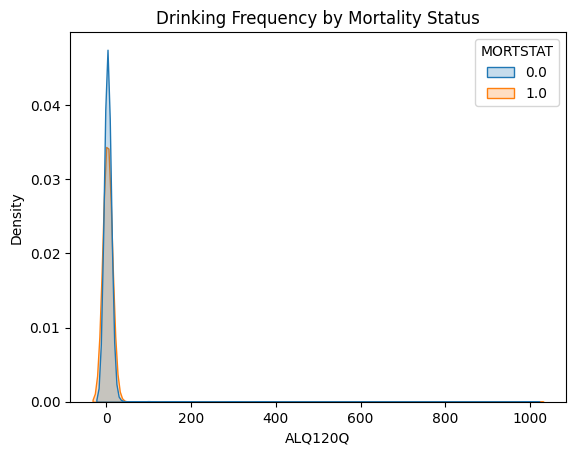

In [ ]:
sns.kdeplot(data=df, x="ALQ120Q", hue="MORTSTAT", fill=True, common_norm=False)
plt.title("Drinking Frequency by Mortality Status")
plt.show()

Most people don’t drink at all, so the peak is at 0 days. A few heavy drinkers create a long tail, and the pattern looks similar for both alive and deceased participants.

Scatterplots of numeric pairs:

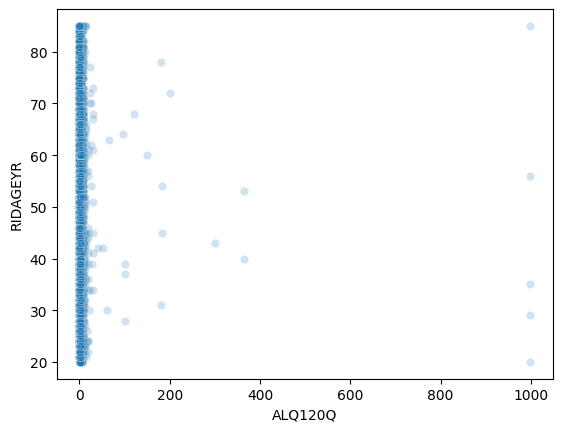

In [ ]:
sns.scatterplot(x="ALQ120Q", y="RIDAGEYR", alpha=0.2, data=df)
plt.show()

This scatterplot shows drinking frequency (ALQ120Q) versus age (RIDAGEYR). Most points overlap at 0 days, meaning most participants didn’t drink. There are many outliers spread across different ages, representing participants who drink frequently. Overall, the plot shows that non-drinking is common across all ages, and heavy drinkers are rare but appear at many different ages.

**Overall Patterms/Key Takeaway:** Most people drink very little or not at all, and age is spread across 20–85. Heavy drinkers are rare but create outliers. Patterns look pretty similar for people who survived versus those who died. Men drink slightly more than women, but overall trends are the same.

3) Using your variables to predict mortality using a k-Nearest Neighbor Classifier. Analyze its performance and explain clearly how you select k.

The value k = 75 was selected because it produced the highest accuracy on the test data and helped reduce overfitting seen at lower k values. Although the model shows strong overall accuracy, it is less effective at correctly predicting mortality outcomes. This indicates that improvements such as using different models or adding better features may be needed.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

def minmax(x):
    return (x - min(x)) / (max(x) - min(x))

df.replace({999: np.nan, 777: np.nan}, inplace=True)

mort_vars = ["ALQ120Q","ALQ130","ALQ140Q","RIDAGEYR"]
model_df = df[mort_vars + ["MORTSTAT"]].dropna()

y = model_df["MORTSTAT"]
x = model_df[mort_vars]

u = x.apply(minmax)


In [ ]:
u_train, u_test, y_train, y_test = train_test_split(u, y, test_size=0.2, random_state=100)


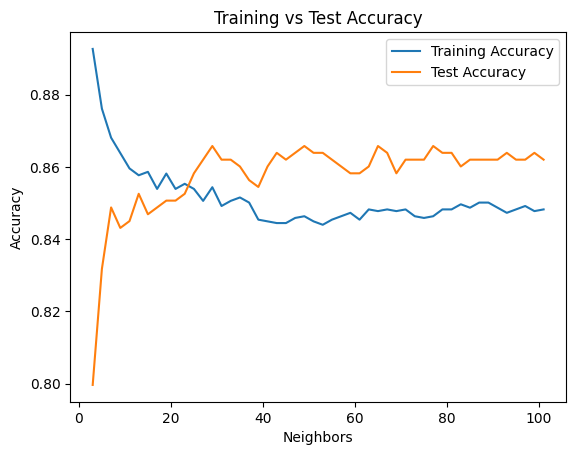

Optimal k: 29
Best Test Accuracy: 0.8657844990548205


In [ ]:
k_grid = np.array([(2*k+3) for k in range(0,50)])  # odd numbers

test_accuracies = []
train_accuracies = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model = model.fit(u_train, y_train)

    test_acc = model.score(u_test, y_test)
    train_acc = model.score(u_train, y_train)

    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

# Plot performance
sns.lineplot(x=k_grid, y=train_accuracies, label="Training Accuracy")
sns.lineplot(x=k_grid, y=test_accuracies, label="Test Accuracy")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy")
plt.show()

# Select optimal k
k_optimal = k_grid[np.argmax(test_accuracies)]
print("Optimal k:", k_optimal)
print("Best Test Accuracy:", max(test_accuracies))


In [ ]:
model = KNeighborsClassifier(n_neighbors=k_optimal)
model = model.fit(u_train, y_train)

y_hat = model.predict(u_test)

print("Confusion Matrix:")
print(pd.crosstab(y_test, y_hat))

print("Accuracy:", accuracy_score(y_test, y_hat))


Confusion Matrix:
col_0     0.0  1.0
MORTSTAT          
0.0       386   22
1.0        49   72
Accuracy: 0.8657844990548205


4) Using your variables to predict life expectancy using a k-Nearest Neighbor Regressor. Analyze its performance and explain clearly how you select k.

The k-NN regression model predicts life expectancy reasonably well. A value of k = 77 was chosen because it resulted in the lowest test MSE and reduced overfitting seen with smaller k values. While the model explains a substantial amount of variation, its performance could be improved by including more features or using a more flexible model.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

reg_df = df[mort_vars + ["PERMTH_INT"]].dropna()

y_reg = reg_df["PERMTH_INT"]
x_reg = reg_df[mort_vars]

u_reg = x_reg.apply(minmax)

u_train, u_test, y_train, y_test = train_test_split(
    u_reg, y_reg, test_size=0.2, random_state=100
)


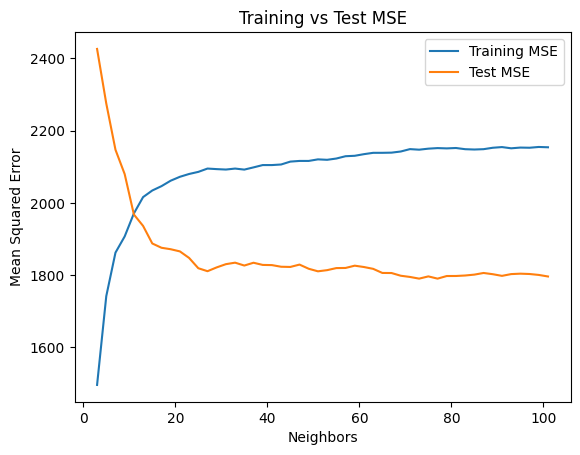

Optimal k (regression): 77
Lowest Test MSE: 1790.4322702069


In [ ]:
k_grid = np.array([(2*k+3) for k in range(0,50)])

test_mse = []
train_mse = []

for k in k_grid:
    model = KNeighborsRegressor(n_neighbors=k)
    model = model.fit(u_train, y_train)

    y_hat_test = model.predict(u_test)
    y_hat_train = model.predict(u_train)

    test_mse.append(mean_squared_error(y_test, y_hat_test))
    train_mse.append(mean_squared_error(y_train, y_hat_train))

# Plot
sns.lineplot(x=k_grid, y=train_mse, label="Training MSE")
sns.lineplot(x=k_grid, y=test_mse, label="Test MSE")
plt.xlabel("Neighbors")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test MSE")
plt.show()

k_optimal_reg = k_grid[np.argmin(test_mse)]
print("Optimal k (regression):", k_optimal_reg)
print("Lowest Test MSE:", min(test_mse))


In [ ]:
model = KNeighborsRegressor(n_neighbors=k_optimal_reg)
model = model.fit(u_train, y_train)

y_hat = model.predict(u_test)

print("Final Test MSE:", mean_squared_error(y_test, y_hat))
print("R²:", r2_score(y_test, y_hat))


Final Test MSE: 1790.4322702069
R²: 0.4041634969093668


5) Describe how your model could be used for health interventions based on patient characteristics. Are there any limitations or risks to consider?

We used a k-Nearest Neighbor model to predict mortality based on drinking habits and age. The best model used k = 29 and had an accuracy of about 87%, so we think that it does well at predicting survivors but making some mistakes for those who died.

This could help identify patients at higher risk so doctors can offer preventive care. However, it only uses a few variables so it may not generalize to everyone, and could be affected by outliers or bias. It’s useful for screening but should be combined with clinical judgment.